In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
Fs=2000 #sample frequency
T = 1 /Fs  # sample interval
te =0.5    # End of time
t = np.arange(0,te,T)  # time vector


noise = np.random.normal(0,0.05,len(t))
x = 0.6*np.cos(2*np.pi*60*t+np.pi/2) + np.cos(2*np.pi*120*t)
y = x + noise     # Sinusoids plus noise


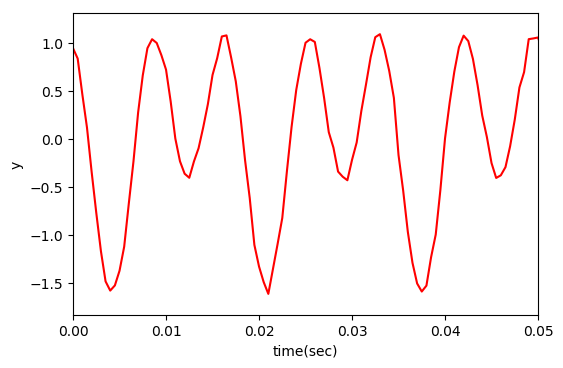

In [11]:
plt.figure(num=1,dpi=100,facecolor='white')
plt.plot(t,y,'r')
plt.xlim(0, 0.05)
plt.xlabel('time(sec)')
plt.ylabel('y')
plt.savefig("./test_figure1.png",dpi=300)

In [6]:
# Calculate FFT ....................
n=len(y)        # Length of signal
NFFT=n      # ?? NFFT=2^nextpow2(length(y))  ??
k=np.arange(NFFT)
f0=k*Fs/NFFT    # double sides frequency range
f0=f0[range(math.trunc(NFFT/2))]        # single sied frequency range

Y=np.fft.fft(y)/NFFT        # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

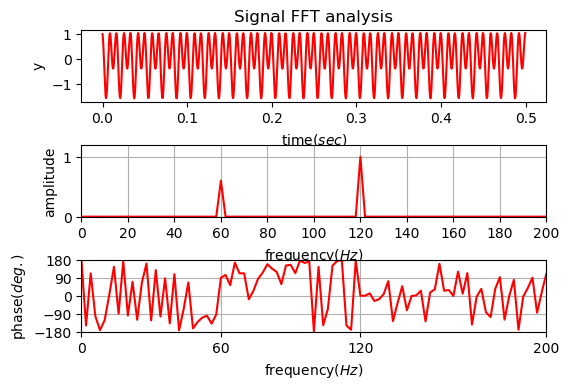

In [7]:

# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
plt.subplot(3,1,1)

plt.plot(t,y,'r')
plt.title('Signal FFT analysis')
plt.xlabel('time($sec$)')
plt.ylabel('y')
#plt.xlim( 0, 0.1)

# Amplitude ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,2)

# Plot single-sided amplitude spectrum.

plt.plot(f0,amplitude_Hz,'r')   #  2* ???
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
#plt.title('Single-Sided Amplitude Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,3)
plt.plot(f0,phase_ang,'r')   #  2* ???
plt.xlim( 0, 200)
plt.ylim( -180, 180)
#plt.title('Single-Sided Phase Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()

plt.savefig("./test_figure2.png",dpi=300)
plt.show()
